In [11]:
import os
import sys
import json
import pandas as pd
import psycopg2
from psycopg2 import Error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [12]:
def get_connection():
    try:
        with open('../services/configuration.json', encoding = 'utf-8') as f:
            config = json.load(f)
            conn =  psycopg2.connect(
                
                user = config['POSTGRES_USER'],
                password = config['POSTGRES_PASSWORD'],
                host = config['POSTGRES_HOST'],
                port = config['POSTGRES_PORT'],
                database = config['POSTGRES_DB'],
                         
            )
        print('Connection with the Database done')
        return conn
    
    except psycopg2.Error as e:
        print('Connection with the database failed: ', e)
        return None

def execute():
    query = """
    SELECT *
    FROM happiness_table
    """
    
    conn = None
    df = None
    
    try:
        conn = get_connection()
        cursor = conn.cursor()
        cursor.execute(query)
        rows = cursor.fetchall()
        column_names = [desc[0] for desc in cursor.description]
        df = pd.DataFrame(rows, columns=column_names)
        cursor.close()
        
    except Error as e:
        print("There was an error executing the query: ", e)
        
    finally:
        if conn is not None:
            conn.close()
    
    return df

df = execute()
df = df.assign(id=range(1, len(df) + 1))
df.head()

Connection with the Database done


,country,happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,government_corruption,generosity,year,happiness_prediction,id
0,Ethiopia,4.350,0.308,0.950,0.391,0.452,0.146,0.220,2018,4.364182,1
1,Namibia,4.441,0.874,1.281,0.365,0.519,0.064,0.051,2018,4.603071,2
2,Pakistan,5.472,0.652,0.810,0.424,0.334,0.113,0.216,2018,4.311951,3
3,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.182,0.262,2019,7.304681,4
4,United States,6.886,1.398,1.471,0.819,0.547,0.133,0.291,2018,6.970070,5


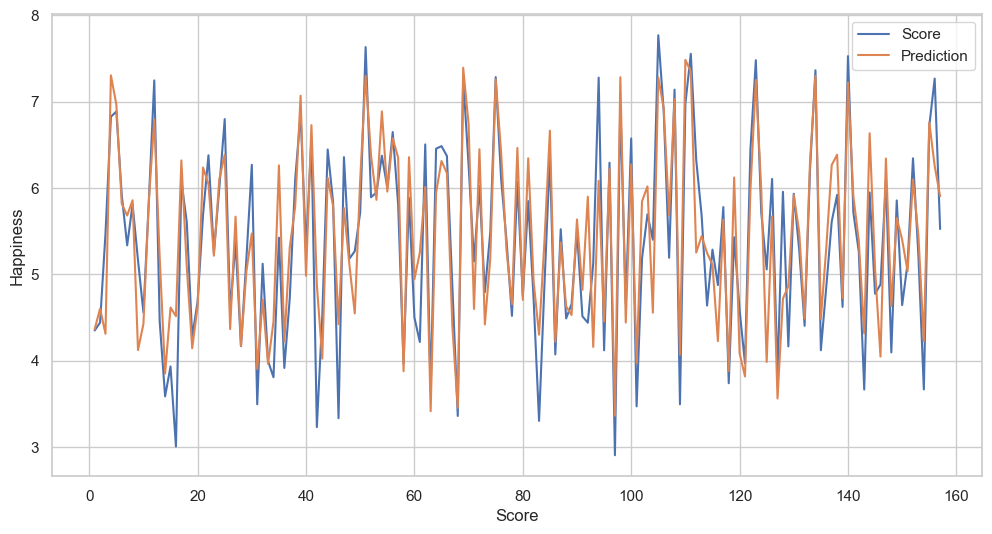

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(df, x='id', y='happiness_score', label = 'Score')
sns.lineplot(df, x='id', y='happiness_prediction', label = 'Prediction')
plt.ylabel('Happiness')
plt.xlabel('Score')
plt.legend()
plt.show()

In [14]:
R2_Score = round(r2_score(df['happiness_score'], df['happiness_prediction']), 2)
print('The model has an accuracy of: ', R2_Score, '%')

The model has an accuracy of:  0.79 %
